In [5]:
# deploy the machine learning model by classsifying the images in the test set
import torch
import torch.nn as nn
import torchvision.models as models

In [6]:
model = models.resnet34(pretrained=True)
model.fc = nn.Linear(512, 2)
model.load_state_dict(torch.load( "model_1.pt"))
model.eval()

c:\Users\alber\anaconda3\envs\tensorflow-gpu\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\alber\anaconda3\envs\tensorflow-gpu\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [7]:
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder

mean = [0.485, 0.456, 0.406]


std = [0.229, 0.224, 0.225]

composed = transforms.Compose([transforms.Resize((224, 224))
                               , transforms.ToTensor()
                               , transforms.Normalize(mean, std)])

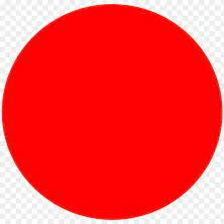

download.jpg is a stop sign


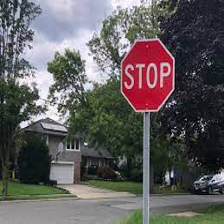

download_1.jpg is a stop sign


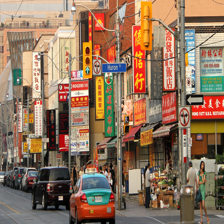

not_stop_1.jpeg is not a stop sign


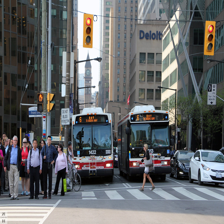

not_stop_2.jpeg is not a stop sign


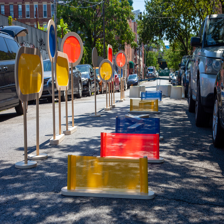

not_stop_3.jpeg is not a stop sign


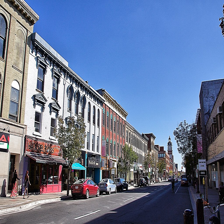

not_stop_4.jpeg is not a stop sign


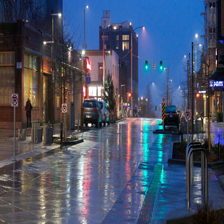

Seattle Bell Street.jpg is not a stop sign


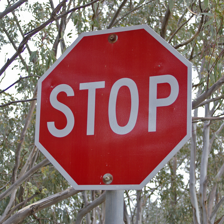

stop_1.jpeg is a stop sign


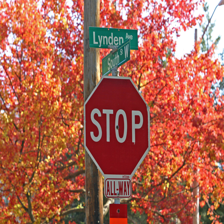

stop_2.jpeg is a stop sign


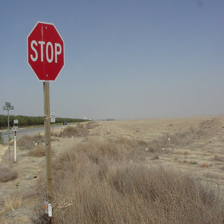

stop_3.jpeg is a stop sign


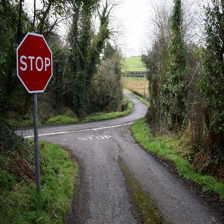

stop_4.jpeg is a stop sign


In [9]:
# create a loop to test the model on the test set
import os
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from PIL import Image

test_folder = "./test_set_stop_not_stop"
for file in os.listdir(test_folder):
    # read the image with pil image
    img = Image.open(os.path.join(test_folder, file))
    # resize the image to display it in the notebook
    img_d = img.resize((224, 224))
    display(img_d)
    # transform the image
    img = composed(img)
    # test the model on the image
    output = model(img.unsqueeze(0))
    # restore probability of the image to be a stop sign
    prob = F.softmax(output, dim=1)
    _, pred = torch.max(prob, 1)
    # print the classification result
    if pred == 1:
        print(file, "is a stop sign")
    else:
        print(file, "is not a stop sign")